In [261]:
from gensim import corpora
from collections import Counter
import nltk
import os

In [262]:
import string
from collections import Counter

In [263]:
%matplotlib inline
import matplotlib.pyplot as plt

In [264]:
os.chdir('/Users/andrewvangilder/Desktop/Newspaper_Text_Files')

In [265]:
newspapers = []
for root, dirs, files in os.walk('/Users/andrewvangilder/Desktop/Newspaper_Text_Files'):
    for file in files:
        if file.endswith('.txt'):
            newspapers.append(file)

In [266]:
!ls
len(newspapers)

1870-03-03:ed-1:seq-10:ocr.txt 1870-03-03:ed-1:seq-5:ocr.txt
1870-03-03:ed-1:seq-11:ocr.txt 1870-03-03:ed-1:seq-6:ocr.txt
1870-03-03:ed-1:seq-12:ocr.txt 1870-03-03:ed-1:seq-7:ocr.txt
1870-03-03:ed-1:seq-2:ocr.txt  1870-03-03:ed-1:seq-8:ocr.txt
1870-03-03:ed-1:seq-3.txt      1870-03-03:ed-1:seq-9:ocr.txt
1870-03-03:ed-1:seq-4:ocr.txt


11

In [267]:
#most scalable and correct so far

chunky_text = []

for i in range(0,len(newspapers)):
    with open(newspapers[i]) as doc:
        chunky_text.append(nltk.word_tokenize(doc.read()))
    

In [268]:
len(chunky_text)

11

In [269]:
text = [item for sublist in chunky_text for item in sublist]

In [286]:
len(text)

print(text)

['MR1TG', 'PRIZE', 'FIGHT', '.', 'Second', 'Enoounter', 'Between', 'Billy', 'Ed', 'wards', ',', 'of', 'New', 'York', ',', 'and', '8am', 'Coll', 'yer', ',', 'of', 'Baltimore', ',', 'lor', '$', '2,000', '.', 'The', 'Battle', 'Fought', 'at', 'Mystic', 'Island', ',', 'Long', 'Island', 'Sound', ',', 'Forty-one', 'Rounds', 'in', 'Forty-five', 'Minutes', '.', 'fidwurdN', 'HuockM', 'Collyer', 'Out', 'ol*', 'Time', '.', 'The', 'match', 'for', 'tu', '#', 'cuirapiomhip', 'or', 'me', 'ilgiu', 'weights', 'between', 'the', 'flglmiig', 'men', 'Billy', 'Ld', 'wards', ',', 'ef', 'New', 'York', ',', 'and', 'Sam', 'Collycr', ',', 'of', 'Uaitlmore', ',', 'lor', '$', '2,000', ',', 'was', 'decided', 'on', 'fclystlc', 'Island', ',', 'opposite', 'Mystic', ',', 'Conn-', ',', 'ou', 'Long', 'Inland', 'Sound', '.', 'yesterday', 'morning', ',', 'resulting', 'in', 'a', 'decisive', 'victory', 'for', 'Kd', 'warde', '.', 'a', 'success', 'evoking', 'from', 'Uis', 'friends', 'many', 'encomium*', '.', 'This', 'battle', '

In [272]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andrewvangilder/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andrewvangilder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [273]:
#s.translate(None, string.punctuation)

#nltk.corpus.stopwords.words("english")

In [278]:
words_to_clean = list(string.punctuation) + list(string.ascii_lowercase) + nltk.corpus.stopwords.words("english") + ['ii','ou','j.','a.','m.','oi',"'s",'aa',"''",'la','l','lu','lor','tho','ihe','1', 'tbe','ith','ol','ot','tue','vvnonislu', 'ulv','tne', 'aud', '``']

#words_to_clean

In [279]:
# remove common words and tokenize
texts = [word.lower() for word in text if word.lower() not in words_to_clean]

#print(texts)

In [280]:
#{word:True for word in texts}

In [281]:
most_common = Counter(texts).most_common()[:30]
most_common

[('street', 343),
 ('new', 278),
 ('mr.', 228),
 ('city', 225),
 ('one', 220),
 ('two', 212),
 ('house', 188),
 ('good', 163),
 ('apply', 153),
 ('york', 139),
 ('would', 136),
 ('st.', 124),
 ('avenue', 123),
 ('near', 119),
 ('march', 118),
 ('broadway', 116),
 ('4', 112),
 ('per', 108),
 ('west', 105),
 ('first', 105),
 ('sale', 104),
 ('let', 100),
 ('room', 98),
 ('10', 97),
 ('man', 89),
 ('made', 89),
 ('three', 89),
 ('committee', 87),
 ('may', 85),
 ('11', 83)]

In [282]:
sorted_word_counts = sorted(list(Counter(texts).values()), reverse=True)

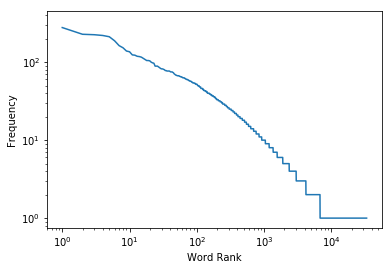

In [283]:
plt.loglog(sorted_word_counts)
plt.ylabel("Frequency")
plt.xlabel("Word Rank");